In [48]:
## Steps for PCA algorithm
## 1) standarize the d-dimensional dataset
## 2) construct the covariance matrix
## 3) Decompose the covariance matrix into its eigenvectors and eigenvalues
## 4) sort the eigenvalues by decreasing order to rank the corresponding eigenvectors
## 5) select k eigenvectors, which correspond to teh k largest eigenvalues
## 6) Construct a projection matrix W from the k eigenvectors
## 7) Multiply by the projection matrix to obtain the new dataset

In [49]:
import pandas as pd

In [50]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [51]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [52]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)

In [53]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc = StandardScaler()

In [59]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [63]:
cov_mat = np.cov(X_train_std.T)
eigen_value, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_value)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [67]:
tot = sum(eigen_value)

In [68]:
var_exp =  [(i / tot) for i in sorted(eigen_value, reverse = True)]

In [70]:
cum_var_exp = np.cumsum(var_exp)

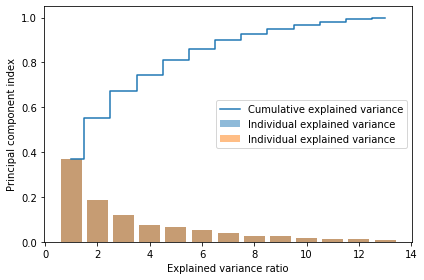

In [73]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.xlabel('Explained variance ratio')
plt.ylabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()